In [1]:
import scanpy
import scanpy.external as sce
import scanpy as sc
import anndata as ad
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#loading and setting up the anndata objects
artemia=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/data_integrated_harmony_DUBStepR_3_2.h5ad", chunk_size=6000)
features_AR=pd.DataFrame({'features': artemia.raw.var['_index']})
artemia_2=ad.AnnData(artemia.raw.X,obs=artemia.obs,var=features_AR,obsm=artemia.obsm,uns=artemia.uns)
artemia_2.var_names=artemia.raw.var['_index']
artemia_2.obs['seurat_clusters'] = artemia_2.obs['seurat_clusters'].astype('category') 
artemia_2.obs['RNA_snn_res.0.05'] = artemia_2.obs['RNA_snn_res.0.05'].astype('category') 
artemia_2.obs['RNA_snn_res.0.2'] = artemia_2.obs['RNA_snn_res.0.2'].astype('category') 
artemia_2.obs['RNA_snn_res.0.5'] = artemia_2.obs['RNA_snn_res.0.5'].astype('category') 
artemia_2.obs['RNA_snn_res.2'] = artemia_2.obs['RNA_snn_res.2'].astype('category') 

/nfs/scistore18/vicosgrp/melkrewi/.local/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/tmp/ipykernel_3970894/1527604099.py:4: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  artemia_2=ad.AnnData(artemia.raw.X,obs=artemia.obs,var=features_AR,obsm=artemia.obsm,uns=artemia.uns)


In [3]:
#rename_clusters
artemia_2
old_to_new = {
    0:'Tracheal cells',
    1:'Germ cells A',
    2:'Ovarian muscle cells',3:'Escort cells',4:'Follicle cells',5:'Prefollicle cells',6:'Germ cells B'}
artemia_2.obs['new_clusters'] = (
    artemia_2.obs['seurat_clusters']
    .map(old_to_new)
    .astype('category')
)
artemia_2.obs['new_clusters'] = artemia_2.obs['new_clusters'].cat.reorder_categories(['Ovarian muscle cells', 'Follicle cells','Tracheal cells','Prefollicle cells','Escort cells','Germ cells A','Germ cells B'])


In [5]:
##integrated
DM_vs_AR=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/map/no_isoforms/maps/ARDM/DM_to_AR.txt",sep="\t",header=None)
AR_vs_DM=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/map/no_isoforms/maps/ARDM/AR_to_DM.txt",sep="\t",header=None)
DM_vs_AR_besthit=DM_vs_AR.loc[DM_vs_AR.groupby(0)[10].idxmin()]
AR_vs_DM_besthit=AR_vs_DM.loc[AR_vs_DM.groupby(0)[10].idxmin()]
merged=pd.merge(DM_vs_AR_besthit,AR_vs_DM_besthit,left_on=0,right_on=1)
merged_2=merged[merged['1_x']==merged['0_y']]

In [7]:
merged_2[merged_2['1_y'].str.contains('mus312',case=False)]

,key_0,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,2_y,3_y,4_y,5_y,6_y,7_y,8_y,9_y,10_y,11_y
9145,mus312-PE,mus312-PE,MSTRG.853.1,47.17,53,28,0,2782,2940,3973,...,47.17,53,28,0,3973,4131,2782,2940,2.550000e-10,66.1


Text(0.8, 1.1, 'Protein\nproduction')

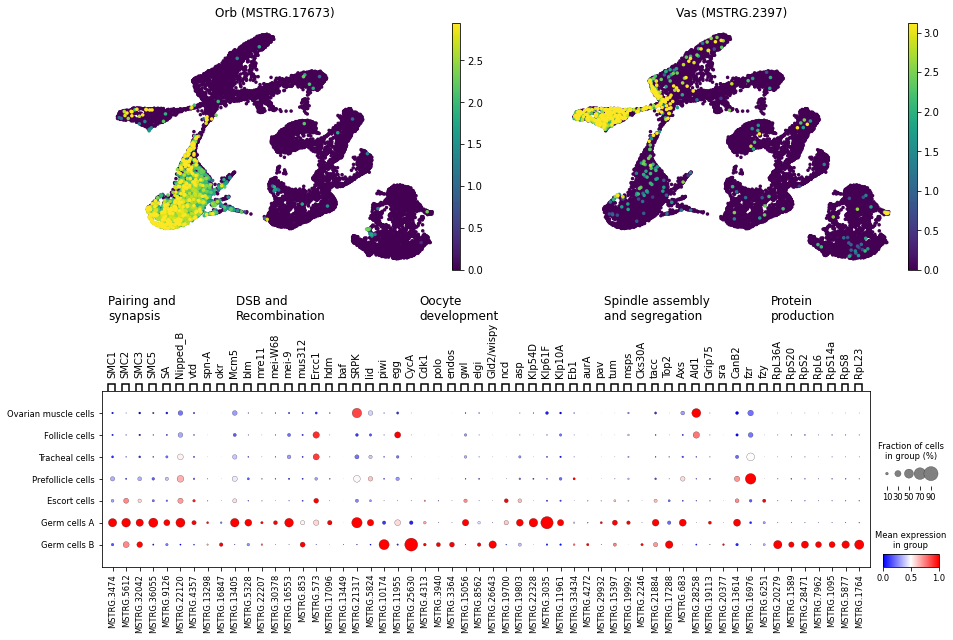

In [8]:
#fig, (ax0,ax1) = plt.subplots(2, 2, figsize=(20,20), gridspec_kw={'wspace':0.1,'hspace':0.3})
import numpy as np
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
#plt.figure(figsize=(20, 5))

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

pl.figure(figsize=(15, 10))
ax0 = pl.subplot(gs[0, 0]) # row 0, col 0
ax0_dict1= sc.pl.umap(artemia_2, color=['MSTRG.17673'], s=50, frameon=False, ncols=2, vmax='p99',show=False,use_raw=False,ax=ax0)#.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/Beatriz_plots/orb.pdf')
ax0.set_title("Orb (MSTRG.17673)")
ax1 = pl.subplot(gs[0, 1]) # row 0, col 1
ax0_dict_2 = sc.pl.umap(artemia_2, color=['MSTRG.2397'], s=50, frameon=False, ncols=2, vmax='p99',show=False,use_raw=False,ax=ax1)
ax1.set_title("Vas (MSTRG.2397)")
ax2 = pl.subplot(gs[1, :]) # row 1, span all columns
markers = { 'SMC1':'MSTRG.3474', 'SMC2':'MSTRG.5612','SMC3':'MSTRG.32042','SMC5':'MSTRG.36055','SA':'MSTRG.9126','Nipped_B':'MSTRG.22120','vtd':'MSTRG.4357','spn-A':'MSTRG.13298', 'okr':'MSTRG.16847','Mcm5':'MSTRG.13405','blm':'MSTRG.5328','mre11':'MSTRG.22207','mei-W68':'MSTRG.30378','mei-9':'MSTRG.16553','mus312':'MSTRG.853','Ercc1':'MSTRG.573','hdm':'MSTRG.17096','baf':'MSTRG.13449', 'SRPK':'MSTRG.21317','lid':'MSTRG.5824','piwi':'MSTRG.10174','egg':'MSTRG.11955','CycA':'MSTRG.25630','Cdk1':'MSTRG.4313','polo':'MSTRG.3940','endos':'MSTRG.3364','gwl':'MSTRG.15056','elgi':'MSTRG.8562','Gld2/wispy':'MSTRG.26643', 'ncd':'MSTRG.19700', 'asp':'MSTRG.19803','Klp54D':'MSTRG.22328','Klp61F':'MSTRG.3035','Klp10A':'MSTRG.11961','Eb1':'MSTRG.33434','aurA':'MSTRG.4272','pav':'MSTRG.29932','tum':'MSTRG.15397','msps':'MSTRG.19992','Cks30A':'MSTRG.2246','tacc':'MSTRG.21884','Top2':'MSTRG.17288','Axs':'MSTRG.683','Ald1':'MSTRG.28258','Grip75':'MSTRG.19113','sra':'MSTRG.20377','CanB2':'MSTRG.13614','fzr':'MSTRG.16976','fzy':'MSTRG.6251','RpL36A':'MSTRG.20279','RpS20':'MSTRG.1589','RpS2':'MSTRG.28471','RpL6':'MSTRG.7962','RpS14a':'MSTRG.1095','RpS8':'MSTRG.5877','RpL23':'MSTRG.1764'}
ax2_dict=sc.pl.dotplot(artemia_2,markers,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',ax=ax2,var_group_rotation=90)
ax2.text(0.008, 1.1, 'Pairing and\nsynapsis',fontsize=12, va='top')#fontweight='bold',
ax2.text(0.16, 1.1, 'DSB and\nRecombination',fontsize=12, va='top')
ax2.text(0.38, 1.1, 'Oocyte\ndevelopment',fontsize=12, va='top')
ax2.text(0.60, 1.1, 'Spindle assembly\nand segregation',fontsize=12, va='top')
ax2.text(0.8, 1.1, 'Protein\nproduction',fontsize=12, va='top')
#ax2.vlines(0,-1,1.5,color="red",linestyle='dashed')
#ax0_dict_1 = sc.pl.umap(artemia_2_test, color=['MSTRG.2397'], s=50, frameon=False, ncols=4, vmax='p99',show=False,use_raw=False,ax=ax0[0])#.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/Beatriz_plots/orb.pdf')
#ax0[0].set_title("Vasa")
#ax0_dict_2 = sc.pl.umap(artemia_2_test, color=['MSTRG.17673'], s=50, frameon=False, ncols=4, vmax='p99',show=False,use_raw=False,ax=ax0[1])
#ax0[1].set_title("Orb")
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/meiosis_markers_simplified_v4.pdf',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

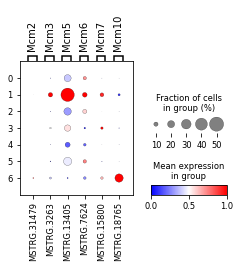

In [9]:
#mcms
markers = { 'Mcm2':'MSTRG.31479', 'Mcm3':'MSTRG.3263','Mcm5':'MSTRG.13405','Mcm6':'MSTRG.7624','Mcm7':'MSTRG.15800','Mcm10':'MSTRG.18765'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/mcms.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

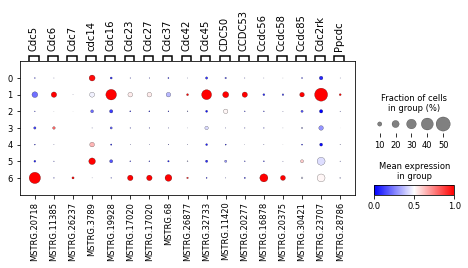

In [10]:
#cdc
markers = { 'Cdc5':'MSTRG.20718', 'Cdc6':'MSTRG.11385','Cdc7':'MSTRG.26237','cdc14':'MSTRG.3789','Cdc16':'MSTRG.19928','Cdc23':'MSTRG.17020','Cdc27':'MSTRG.17020','Cdc37':'MSTRG.68','Cdc42':'MSTRG.26877','Cdc45':'MSTRG.32733','CDC50':'MSTRG.11420','CCDC53':'MSTRG.20277','Ccdc56':'MSTRG.16878','Ccdc58':'MSTRG.20375','Ccdc85':'MSTRG.30421','Cdc2rk':'MSTRG.23707','Ppcdc':'MSTRG.28786'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/cdc.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

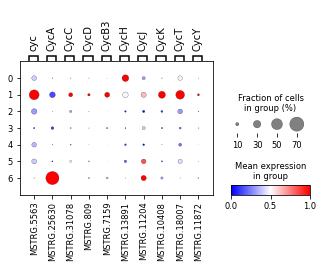

In [153]:
#cyclins
markers = {'cyc':'MSTRG.5563','CycA':'MSTRG.25630','CycC':'MSTRG.31078','CycD':'MSTRG.809','CycB3':'MSTRG.7159','CycH':'MSTRG.13891','CycJ':'MSTRG.11204','CycK':'MSTRG.10408','CycT':'MSTRG.18007','CycY':'MSTRG.11872'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/cyclins.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

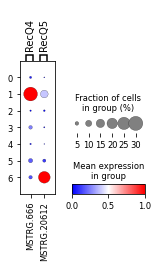

In [107]:
#recq
markers = { 'RecQ4':'MSTRG.666', 'RecQ5':'MSTRG.20612'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var')
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/recq.png',bbox_inches='tight',facecolor='white', edgecolor='white')

{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

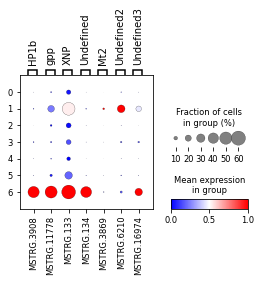

In [11]:
#heterochromatin
markers = { 'HP1b':'MSTRG.3908', 'gpp':'MSTRG.11778','XNP':'MSTRG.133','Undefined':'MSTRG.134','Mt2':'MSTRG.3869','Undefined2':'MSTRG.6210','Undefined3':'MSTRG.16974'}
sc.pl.dotplot(artemia_2,markers,'seurat_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90)
#plt.savefig('genes_involved_in_meiotic_maturation.png',bbox_inches='tight',facecolor='white', edgecolor='white')
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/recq.png',bbox_inches='tight',facecolor='white', edgecolor='white')

Text(0.5, 1.0, 'phagocytosis')

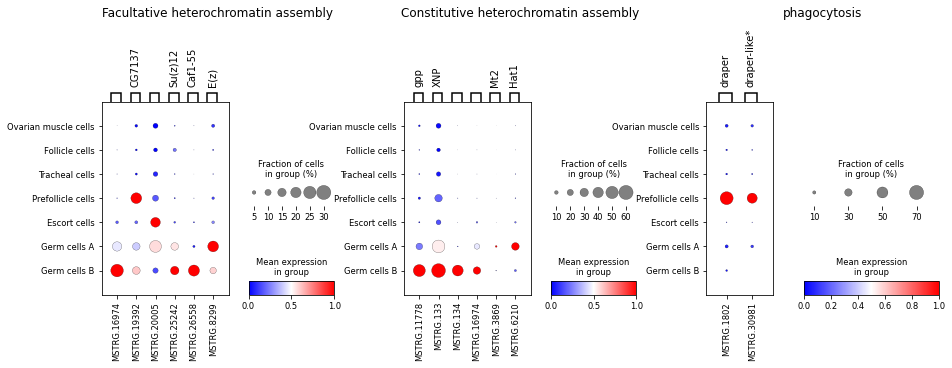

In [12]:
#Facultative heterochromatin assembly
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,5), gridspec_kw={'wspace':0.3})
FC={' ':'MSTRG.16974','CG7137':'MSTRG.19392','   ':'MSTRG.20005','Su(z)12':'MSTRG.25242','Caf1-55':'MSTRG.26558','E(z)':'MSTRG.8299'}
sc.pl.dotplot(artemia_2,FC,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',ax=ax1,var_group_rotation=90)
ax1.set_title("Facultative heterochromatin assembly")
#Constinutive heterochromatin assembly
CC={'gpp':'MSTRG.11778','XNP':'MSTRG.133','   ':'MSTRG.134',' ':'MSTRG.16974','Mt2':'MSTRG.3869','Hat1':'MSTRG.6210'}
sc.pl.dotplot(artemia_2,CC,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',ax=ax2,var_group_rotation=90)
ax2.set_title("Constitutive heterochromatin assembly")
markers = { 'draper':'MSTRG.1802','draper-like*':'MSTRG.30981'}
sc.pl.dotplot(artemia_2,markers,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90,ax=ax3)
ax3.set_title("phagocytosis")
#plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/heterochromatin_and_draper.png',bbox_inches='tight',facecolor='white', edgecolor='white')

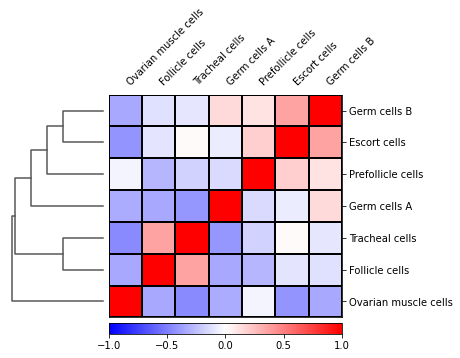

In [14]:
sc.pl.correlation_matrix(artemia_2,groupby='new_clusters',save='dendogram_and_correlation.pdf')


{'mainplot_ax': <AxesSubplot:>,
 'gene_group_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

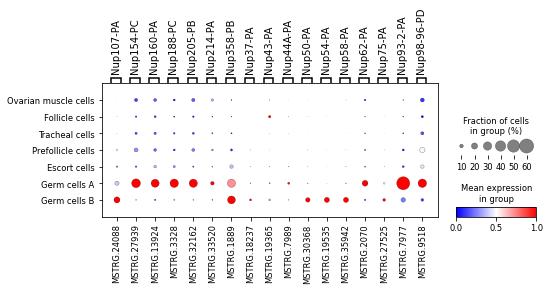

In [13]:
nucleoporins={'Nup107-PA': 'MSTRG.24088', 'Nup154-PC': 'MSTRG.27939','Nup160-PA': 'MSTRG.13924', 'Nup188-PC': 'MSTRG.3328', 'Nup205-PB':'MSTRG.32162','Nup214-PA':'MSTRG.33520',
 'Nup358-PB':'MSTRG.1889',
 'Nup37-PA':'MSTRG.18237',
 'Nup43-PA':'MSTRG.19365',
 'Nup44A-PA':'MSTRG.7989',
 'Nup50-PA':'MSTRG.30368',
 'Nup54-PA': 'MSTRG.19535',
 'Nup58-PA': 'MSTRG.35942',
 'Nup62-PA': 'MSTRG.2070',
 'Nup75-PA': 'MSTRG.27525',
 'Nup93-2-PA': 'MSTRG.7977',
 'Nup98-96-PD': 'MSTRG.9518'}
sc.pl.dotplot(artemia_2,nucleoporins,'new_clusters',cmap='bwr',show=False,use_raw=False,standard_scale='var',var_group_rotation=90)



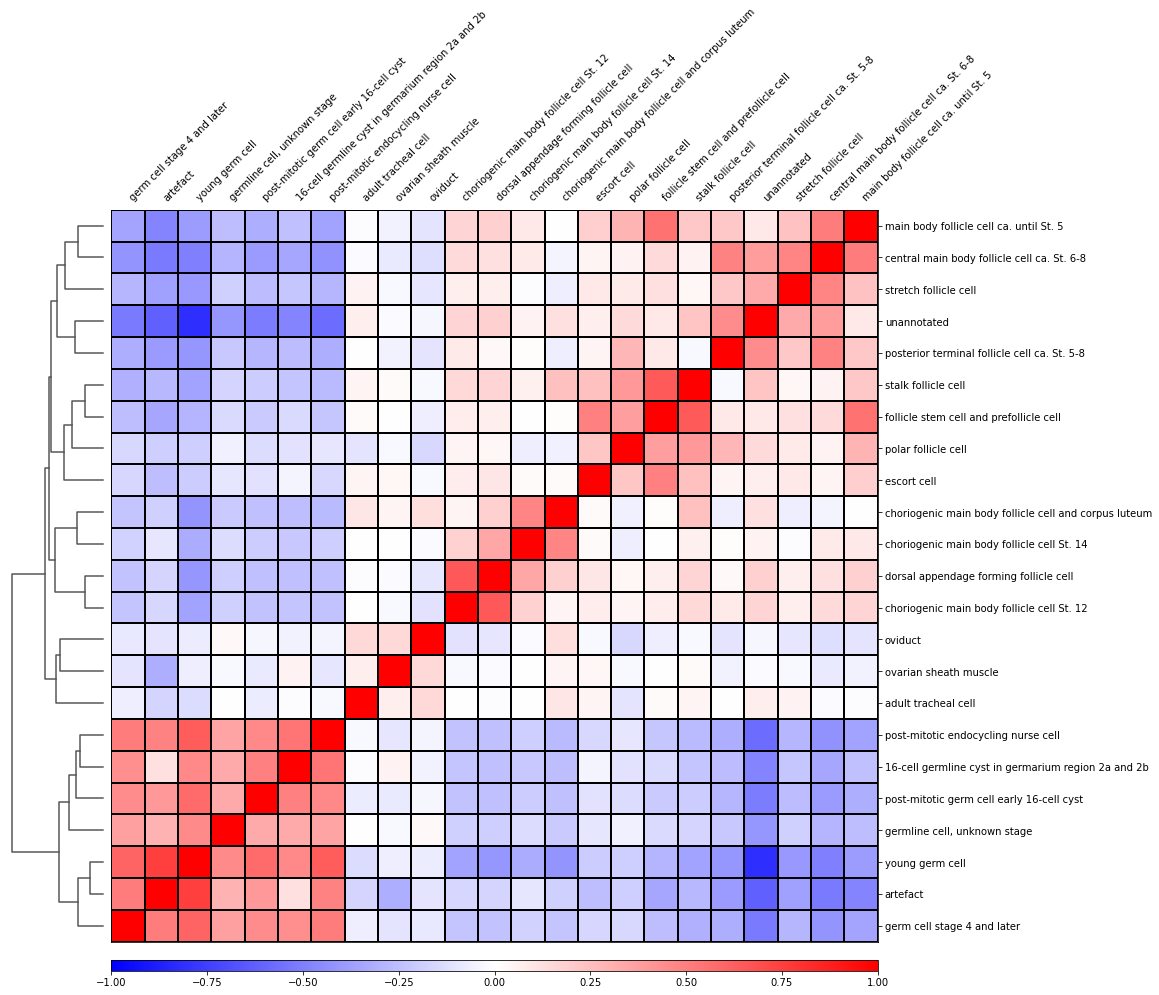

In [15]:
drosophila=scanpy.read_h5ad("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries/22.cellblender/analysis_6/s_fca_biohub_ovary_10x.h5ad", chunk_size=6000)
sc.pl.correlation_matrix(drosophila,groupby='annotation',save='drosophiladendogram_and_correlation.pdf')